# Master Data Science In 4 Weeks

## Hands-On Project 1: The Pipeline of Machine Learning

In this hands-on project, we will show the **Pipeline of Machine Learning Project** using the housing price prediction example. 

When solving the real data science problem using machine learning techniques, experienced data scientists usually have the following checklist in mind.

- Understand the problem and draw the big picture. 
- Get the data. 
- **Explore the data**: gain some insights.
- **Data preprocessing** and **feature engineering**. 
- Explore some reasonable **machine learning models** and shortlist the best ones. 
- **Fine-tune** your models and combine them to get a better one. 
- Present your solution. 
- Launch, monitor and maintain your system.  

In this project, we will show the pipeline step by step. 

## 0. Problem Description

In this hands-on project, we will show the **Pipeline of Machine Learning Project** using the **housing price prediction** example. The data could be download at [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

The reasons we use this example are following:

1. This is a real problem you may meet in your life. For example, if you want to buy a new house, this may help you to estimate the price. 
2. This dataset is not clean, it's suitable for us to show some common used data cleaning and feature engineering techniques. 
3. The dataset is suitable for beginners to get start. 
4. A similar dataset for house price in Singapore could be provided for you to explore by yourself.

**Hope you can enjoy it.**

## 1.1 Set Up

First, we will import some common used libraries in the following four weeks. 

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd
import seaborn as sns

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Import some statics
from scipy.stats import skew
from scipy.stats.stats import pearsonr

## 1.2 Load Data
**Pandas** is the most popular library in Python to handle data frame.  

In [2]:
# Set the relative director for training data
root_dir = "."
train_data_dir = root_dir + "/datasets/train.csv"

# read the data frame
train_data = pd.read_csv(train_data_dir)

# Print out some data samples
train_data.head()

#save index

index_array = train_data['Id']

## 2 Explore the data and gain some insights

In this part, we will visualize the dataset to help us to understand the data better. This is one of the most important steps when you try to analyze and understand your problem and data. 

### 2.1 Get a summary of your dataset with one line code

In pandas, there is a very useful function called **describe()**, this function can generate a summary for the dataframe. 

In [3]:
print(train_data.columns)
train_data.describe()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 2.2 Look at the distribution of target variable

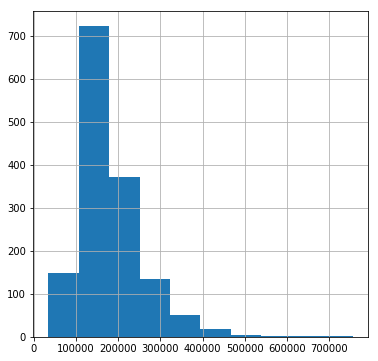

In [4]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
train_data['SalePrice'].hist()

We can see that the **SalePrice** is skewed. We will see later how can we handle this. 

### 2.3 Explore some relations between selected features and target variable

Correlation is a statistical value to imply the linear relationship between two variables. One way to explore the relations between features and target variable is to visualize the correlation between features and target variable. This is just a very rough idea, since correlations can only imply the **linear relationships** between two variables. 

In [31]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


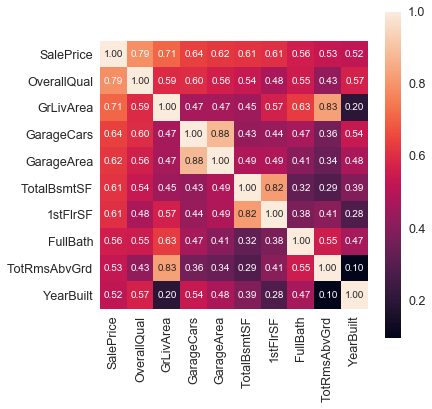

In [5]:
#saleprice correlation matrix
corrmat = train_data.loc[:,'MSSubClass':'SalePrice'].corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Although this is a very rough exporation, we still see that there are some meaningful features which agree with our common sense, for example, **Overall Quality, GrLivArea, Year Built**. Below, we visualize one of them.

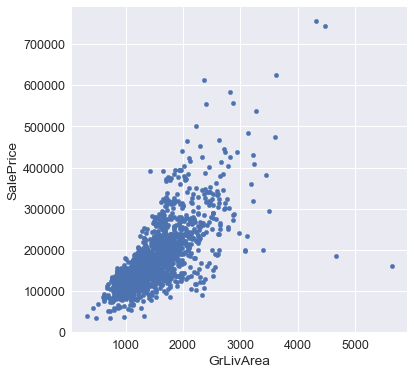

In [6]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
train_data.plot(kind='scatter', x = var, y = 'SalePrice')

## 3 Data preprocessing and feature engineering

Data preprocessing and feature engineering are extremely important in data science projects. 

In [32]:
# Separate Features and Target Variables

X_train = train_data.loc[:, 'MSSubClass':'SaleCondition']
y_train = train_data['SalePrice']

### 3.1 Handle Categorical Features

Usually, we need to convert categorical features to numerical values. Instead of naively convert them to a sequence of integers, a common used idea is **One-hot-encoding**. In **Pandas**, there is a method called **get_dummies** to do it.

In [8]:
X_train = pd.get_dummies(X_train)

# Visualize
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=288)

### 3.2 Missing Data

Missing data(usually indicated as **nan** in data matrix) is a common noise in real datasets, if we do not handle missing data, we need to drop the samples with **nan** values in training data, since we cannot do numerical computations for **nan** values. In test data, this is a disaster, because it means we cannot predict the value of corresponding target variable. 

In general, we can classfy the preprocessing strategies into two categories. 

**Naive Idea**: Drop the features with missing data. This is not a wise idea, but sometimes it works if you are confident that the corresponding feature is not important for prediction. 

**Popular Idea**: Imputation. We can replace the missing data with some statistics, like mean or median. 

In [9]:
#filling NA's with the mean of the column:
X_train = X_train.fillna(X_train.mean())

NOTE:
Depending on the distribution, average (if even distributed) or median (unevenly distribution eg income)
common point - if categorical

### 3.3 Handle Skewed Data

One popular way to handle the skewed positive data is to take the logorithm. Just like the figure we show in data exploration part, this will make the data more normal.

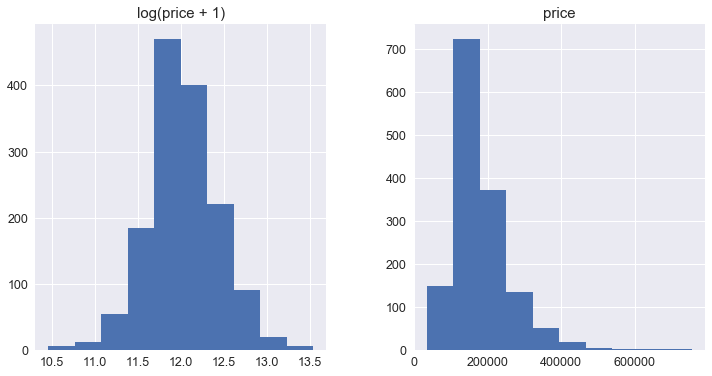

In [10]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train_data["SalePrice"], "log(price + 1)":np.log1p(train_data["SalePrice"])})
prices.hist()
y_train = np.log1p(y_train)

In [11]:
# Handle other skewed features.  
numerical_feats = X_train.dtypes[X_train.dtypes != "object"].index

# compute skewness of the numerical features
skewed_feats = X_train[numerical_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
X_train[skewed_feats] = np.log1p(X_train[skewed_feats])

### Splitting Training Datasets into Training set and Validation set. 

This is very important, experienced data scientists always do this. What we really care about is the accuracy of the model on unseen data. Usually, the test data is not available when we train the model. So, in order to evaluate the performance of your machine learning model on unseen data and preventing overfitting, we usually split the training set into two datasets randomly, using part of the training data as **validation data(10% - 20%)**. If the training data is limited, then we usually do **cross-validation**. There are **train_test_split** function in **Scikit Learn**.

In [12]:
# But if you use scikit learn, cross-validation is built-in method
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val, train_id, val_id = train_test_split(X_train, y_train, index_array,test_size = 0.2, random_state = 42)

In [13]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,3.816582,4.220267,9.122386,6.121575,5.584760,1970.965753,1984.897260,2.200885,4.238420,0.640925,...,0.002374,0.057564,0.001187,0.866438,0.045695,0.002374,0.004154,0.010682,0.825342,0.058158
std,0.689740,0.313899,0.516790,1.367619,1.116062,30.675495,20.733955,2.632173,2.993610,1.824924,...,0.040511,0.191359,0.028670,0.340326,0.172078,0.040511,0.053522,0.085419,0.379837,0.192253
min,3.044522,3.091042,7.170888,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.044522,4.110874,8.934356,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.931826,4.263383,9.169623,6.000000,5.000000,1972.000000,1994.000000,0.000000,5.954540,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.262680,4.382027,9.367430,7.000000,6.000000,2001.000000,2004.000000,5.117994,6.582022,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.252273,5.749393,12.279537,10.000000,9.000000,2010.000000,2010.000000,7.229114,8.638525,7.028201,...,0.693147,0.693147,0.693147,1.000000,0.693147,0.693147,0.693147,0.693147,1.000000,0.693147


## Explore some reasonable models

Usually, after you prepared your data, you will begin to try some reasonable machine learning model to solve your problem. In this problem, we will try **Linear Regression**, **Linear Regression with Regularization(Ridge Regression, Lasso)**, **Decision Tree**, **XGBoost** models. 

The most fundamental model called **Linear Regression**, which has the fllowing form:
$$\frac{1}{2}\sum_{i=1}^n[(y_i - \sum_{j=1}^d X_{ij}w_j)^2]$$
Or, we can write it in the following compact matrix form
$$\min_{w} \frac{1}{2}\|y_{train} - X_{train}w\|_2^2$$

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model_linear_reg = LinearRegression()

# Train your Linear Regression Model on Training Set
model_linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
# Yeah, you get your first Machine Learning Model
# Print out some values 

data_sample = X_train.iloc[100:105]
y_sample = y_train.iloc[100:105]
print("Predictions: \t", model_linear_reg.predict(data_sample))
print("True Labels: \t", np.array(y_sample))

# compute the mean-square error on training set
y_pred_linear_reg = model_linear_reg.predict(X_train)
mse_model_linear_reg = mean_squared_error(y_train, y_pred_linear_reg)
print("The Mean-Square-Error of the linear regression model is:", mse_model_linear_reg)
# It seems not that bad!!!

Predictions: 	 [ 11.8088153   12.74187629  11.80545487  12.9989007   11.78511312]
True Labels: 	 [ 11.75979336  12.65973727  11.78296024  13.0086615   11.75587949]
The Mean-Square-Error of the linear regression model is: 0.00777671434975


In [16]:
# Explore the learned parameters we get

print("The value of w is:", model_linear_reg.coef_)

The value of w is: [ -1.11756400e-02  -2.22278824e-03   9.00901902e-02   3.56162959e-02
   3.81921924e-02   2.05388067e-03   1.11863375e-03   9.10755511e-04
   1.54316027e-02   3.24680038e-03  -2.71990525e-03   1.00111111e-01
  -3.87591836e-02  -8.90231985e-04  -2.85191740e-03   4.42585309e-01
   2.59816883e-02   1.29684647e-02   1.45306761e-02   1.79515053e-02
   5.93472692e-03  -1.25370155e-01   6.86607606e-04   1.86141879e-02
  -1.72806858e-04   1.40905301e-02   1.31481516e-04   3.36121524e-03
   1.81616443e-03   1.87494411e-03   7.06756901e-03   7.80553896e-03
   4.58483303e+00  -5.35880886e-03  -1.00233819e-03  -3.54629688e-03
  -3.52906086e-01   1.40197398e-01   1.14503994e-01   5.39590170e-02
   6.08031537e-02  -1.59535248e-02   2.30160711e-02   2.10539850e-02
   5.29597635e-02  -2.29326042e-02  -6.64936321e-03   3.13446541e-02
  -1.26951695e-02  -1.33996981e-02   3.65335958e-02  -2.94875303e-02
   9.16635429e-03   1.23463525e-01  -8.55783939e-02   6.30709172e-02
   8.71814696e-

### Regularization

We can see that, the values of all parameters are nonzeros. However, we know there are some features in the dataset that are not benifit for us to predict the price of the house. In other words, we want to do the feature selections to get the useful features automatically. One popular way to achieve this goal is to add a regularization term $\|\cdot\|_1$ which can enforce the parameters to be sparse. 

Later, you will learn the regularization term from the aspect of preventing over-fitting. 

So, in order to do feature selection, we will consider the following regularized linear model, called **Lasso**:
$$\min_{w} \frac{1}{2}\|y_{train} - X_{train}w\|_2^2 + \alpha \|w\|_1$$
where $\alpha >0$ is the hyperparameter to control the strength of the regularization term. 

In [17]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha = 0.01, max_iter= 4000)

# choose the value of your hyperparameter alpha
# Train your model
model_lasso.fit(X_train, y_train)


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=4000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [18]:
# Print out some results to see the performance
data_sample = X_train.iloc[100:105]
y_sample = y_train.iloc[100:105]
print("Predictions: \t", model_lasso.predict(data_sample))
print("True Labels: \t", np.array(y_sample))

y_pred_lasso = model_lasso.predict(X_train)
mse_model_lasso = mean_squared_error(y_train, y_pred_lasso)
print("The Mean-Square-Error of the Lasso model is:", mse_model_lasso)

Predictions: 	 [ 11.88719094  12.72859593  11.96568146  12.8987263   11.86942006]
True Labels: 	 [ 11.75979336  12.65973727  11.78296024  13.0086615   11.75587949]
The Mean-Square-Error of the Lasso model is: 0.0230142499267


If you look at the results and compare them to the predictions we get from linear regression, you can see that the performance is worse. This is contradict to your common sense since we should get better results if we exclude some irrelavent features. 

**Analysis**: The problem maybe we select a inappropriate hyperparameter. 

In [19]:
model_lasso_2 = Lasso(alpha= 0.0002, max_iter= 4000)
model_lasso_2.fit(X_train, y_train)

# print out something
data_sample = X_train.iloc[100:105]
y_sample = y_train.iloc[100:105]
print("Predictions: \t", model_lasso_2.predict(data_sample))
print("True Labels: \t", np.array(y_sample))

y_pred_lasso_2 = model_lasso_2.predict(X_train)
mse_model_lasso_2 = mean_squared_error(y_train, y_pred_lasso_2)
print("The Mean-Square-Error of the new lasso model is:", mse_model_lasso_2)

Predictions: 	 [ 11.74331671  12.72384969  11.79943948  12.97974833  11.77558877]
True Labels: 	 [ 11.75979336  12.65973727  11.78296024  13.0086615   11.75587949]
The Mean-Square-Error of the new lasso model is: 0.00930105224739


### A better way to evaluate the performance of your machine learning model

In real project, what we really care about is the testing error. However, we cannot evaluate our machine learning model on the test dataset before we launch our model. One possible way to estimate the performance of our model on unseen data is cross-validation. 

In [20]:
from sklearn.model_selection import cross_val_score
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [21]:
alphas = [0.01, 0.0002]
cv_lasso = [rmse_cv(Lasso(alpha = alpha, max_iter= 4000)).mean() 
            for alpha in alphas]
cv_lasso = pd.Series(cv_lasso, index = alphas)
print("Cross Validation Error for Lasso:", cv_lasso)
#cv_lasso.plot(title = "Validation Error")
#plt.xlabel("alpha")
#plt.ylabel("rmse")

cv_linear_reg = rmse_cv(model_linear_reg).mean()
print("Cross Validation Error for Linear Regression:", cv_linear_reg)

Cross Validation Error for Lasso: 0.0100    0.154992
0.0002    0.131829
dtype: float64
Cross Validation Error for Linear Regression: 0.14139762169


In [22]:
print("The smallest validation error is:",(cv_lasso.min()))

The smallest validation error is: 0.131828872768


Now, we try to explore more linear models. 
In high-dimensional problem, we usually want to get a sparse solution, One popular model to get the sparse solution is Lasso. 

In [23]:
model_lasso_better = Lasso(alpha= 0.0002, max_iter= 4000)
model_lasso_better.fit(X_train, y_train)

Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=4000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Now, we check whether Lasso has the ability to do feature selection or not. 

In [24]:
coef = pd.Series(model_lasso_better.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 142 variables and eliminated the other 146 variables


Now, we try to check whether the Lasso model selected the meaningful features or not. To do this, we visualize the important features selected by Lasso model. 

Text(0.5,1,'Important Coefficients in the Lasso Model')

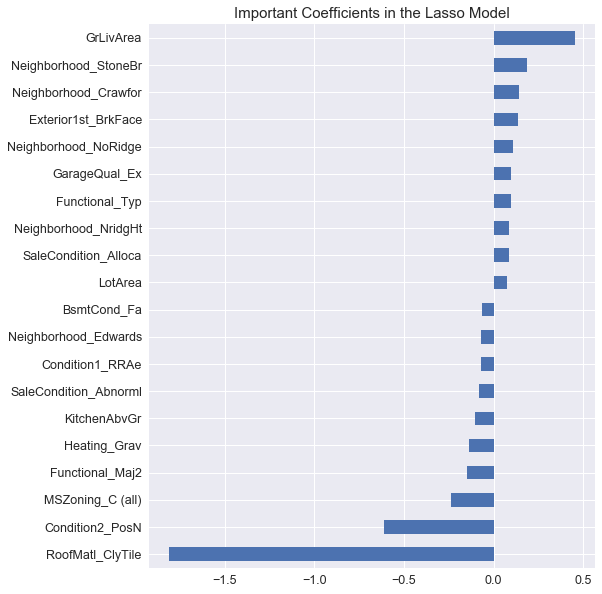

In [25]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

# Visualize them.
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Important Coefficients in the Lasso Model")

## Fine Tune Your Machine Learning Model

Now, we have some models in hand. However, we want to fine tune our machine learning model to get better results. Usually, we will fine tune our model in two ways:

- **Hyperparameter Tuning**: From the example showed in Lasso model, when the hyperparameters are not selected appropriately, we may get poor results. 

- **Model Ensemble**: In the idea of ensemble, you will combine some short-listed models together via weighted average to get better results. This is commonly used in real problems. One intuitive reason why ensemble could get a better result is, ensemble can reduce the variance of the single models. 

### Grid Search

How to do **Hyperparameter Tuning** is very problem dependent. Some useful ideas are:

1. Try some descrete values to determine the rough range of the hyperparameters. 
2. Use Grid Search or Random Search to fine tune your hyperparameters in the range. 

To do Grid search, you can get Scikit-Learn’s GridSearchCV to search for you. All you need to do is tell it which
hyperparameters you want it to experiment with, and what values to try out, and it will evaluate all the
possible combinations of hyperparameter values, using cross-validation.

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'alpha':np.arange(0.0001,0.01,0.0002)}
]

model_lasso_cv = Lasso(max_iter=4000)

grid_search = GridSearchCV(model_lasso_cv, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=4000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': array([ 0.0001,  0.0003,  0.0005,  0.0007,  0.0009,  0.0011,  0.0013,
        0.0015,  0.0017,  0.0019,  0.0021,  0.0023,  0.0025,  0.0027,
        0.0029,  0.0031,  0.0033,  0.0035,  0.0037,  0.0039,  0.0041,
        0.0043,  0.0045,  0.0047,  0.0049,  0.0051,  0.0053,  0.0055...1,  0.0083,
        0.0085,  0.0087,  0.0089,  0.0091,  0.0093,  0.0095,  0.0097,
        0.0099])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [27]:
## Find the best parameters
grid_search.best_params_

{'alpha': 0.00050000000000000012}

In [28]:
### Use the best One 
model_lasso_best = grid_search.best_estimator_
print("Cross_Validation rmse is:", rmse_cv(model_lasso_best).mean())

Cross_Validation rmse is: 0.129817883601


## Evaluate the Results on Test Data Set

In [29]:
y_pred_linear_reg = model_linear_reg.predict(X_val)
y_pred_lasso = model_lasso_best.predict(X_val)

print("The Mean-Square-Error of the linear regression model is:", mean_squared_error(y_val, y_pred_linear_reg))
print("The Mean-Square-Error of the  lasso model is:", mean_squared_error(y_val, y_pred_lasso))

The Mean-Square-Error of the linear regression model is: 0.0196820645521
The Mean-Square-Error of the  lasso model is: 0.0167906729961


In [30]:
solution = pd.DataFrame({"id":val_id, "SalePrice":y_pred_lasso})
solution.to_csv("lasso_sol.csv", index = False)